# 1. Setup

In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.1.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.5.18.1
charset-normalizer           2.0.12
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.6.0
decorator                    5.1.1
entrypoints                  0.4
executing                    0.8.3
flatbuffers                  1.12
fonttools                    4.33.3
gast                         0.4.0
google-auth                  2.6.6
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.46.3
h5py                         3.7.0
idna                         3.3
importlib-metadata           4.11.4
ipykernel                    6.13.0
ipython                      8.4.0
jedi                         0.18.1
jupy

You should consider upgrading via the 'c:\users\zubai\deep learning\imageclassification\imageclassification\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
import os

# 2. Remove problematic images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\mancity\03f7e-16223913896297-800.jpg
Image not in ext list data\mancity\1619282247_kevin-de-bruyne.jpg
Image not in ext list data\mancity\220px-MC-Shahter_28229.jpg
Image not in ext list data\mancity\22_1558086810232_1565245761679.jpg
Image not in ext list data\mancity\4abbf-1532249568-800.jpg
Image not in ext list data\mancity\86178-16480052995656-1920.jpg
Image not in ext list data\mancity\city_1620162266723_1628874845208.jpg
Image not in ext list data\mancity\d3693-16438092861735-1920.jpg
Image not in ext list data\mancity\Manchester_City_players-AP.jpg
Image not in ext list data\mancity\skysports-kevin-de-bruyne-raheem-sterling_4920953.jpg
Image not in ext list data\mancity\skysports-pep-guardiola-manchester-city_5547242.jpg
Image not in ext list data\manutd\227f3-16443302094628-1920.jpg
Image not in ext list data\manutd\320830-football.webp
Image not in ext list data\manutd\3defc-16382992285485-1920.jpg
Image not in ext list data\manutd\985581-fdgwnlfxea

# 3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 334 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
for idx, img in enumerate(batch[0][:4]):
    print(idx,img)

0 [[[ 57.5       56.        68.16406 ]
  [ 60.25      58.25      69.25    ]
  [ 58.945312  53.04297   62.75    ]
  ...
  [ 28.554688  28.335938  33.945312]
  [ 29.542969  30.542969  34.933594]
  [ 28.109375  29.109375  33.359375]]

 [[ 61.941406  60.441406  73.19141 ]
  [ 59.171875  57.171875  68.171875]
  [ 58.94922   53.078125  64.27734 ]
  ...
  [ 30.535156  28.363281  33.70703 ]
  [ 32.335938  32.992188  37.164062]
  [ 31.984375  30.984375  36.984375]]

 [[ 61.847656  59.347656  72.63281 ]
  [ 59.01172   55.046875  68.94141 ]
  [ 63.59375   57.878906  67.02344 ]
  ...
  [ 32.535156  29.535156  36.535156]
  [ 34.046875  35.046875  40.046875]
  [ 30.796875  31.796875  36.796875]]

 ...

 [[ 96.11719   60.867188  64.86719 ]
  [101.76172   66.51172   70.51172 ]
  [ 98.58203   66.58203   69.58203 ]
  ...
  [ 40.714844  32.714844  29.964844]
  [ 41.26172   33.26172   31.261719]
  [ 47.070312  36.820312  34.820312]]

 [[ 96.19922   61.921875  64.78516 ]
  [102.55469   66.72656   70.72656 

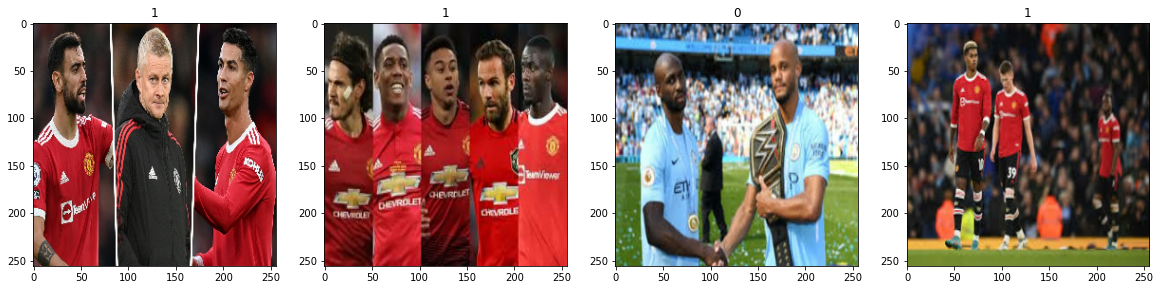

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 0.8735 - accuracy: 0.4732 - val_loss: 0.6391 - val_accuracy: 0.4531
Epoch 2/20
7/7 [==============================] - 7s 863ms/step - loss: 0.5188 - accuracy: 0.6786 - val_loss: 0.3182 - val_accuracy: 0.9219
Epoch 3/20
7/7 [==============================] - 7s 828ms/step - loss: 0.1850 - accuracy: 0.9777 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 7s 952ms/step - loss: 0.0505 - accuracy: 0.9821 - val_loss: 0.0789 - val_accuracy: 0.9844
Epoch 5/20
7/7 [==============================] - 8s 944ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.1544 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 7s 933ms/step - loss: 0.0976 - accuracy: 0.9643 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 7s 931ms/step - loss: 0.0253 - accuracy: 0.9955 - val_loss: 8.3489e-04 - val_accuracy: 1.0000
Epoch 8/20
7/7 [===

# 8. Plot Performance

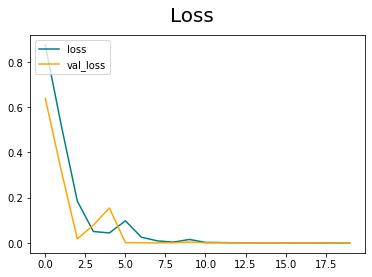

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

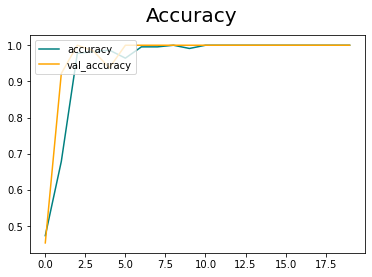

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 295ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

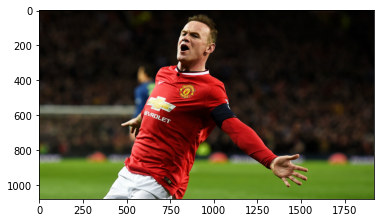

In [73]:
img = cv2.imread('290ad07659562ee9d085595441fe014548c5de2c.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

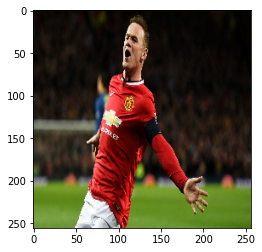

In [74]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [75]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [76]:
yhat

array([[0.9998731]], dtype=float32)

In [77]:
if yhat > 0.5: 
    print(f'Predicted team is Man Utd')
else:
    print(f'Predicted team is Man City')

Predicted team is Man Utd


# 11. Save the Model

In [69]:
from tensorflow.keras.models import load_model

In [70]:
model.save(os.path.join('models','teamclassifier.h5'))

# 12. Test the saved Model

In [71]:
new_model = load_model('models/teamclassifier.h5')

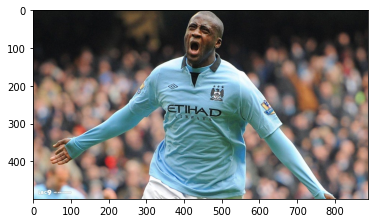

In [78]:
img = cv2.imread('wp2006035.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

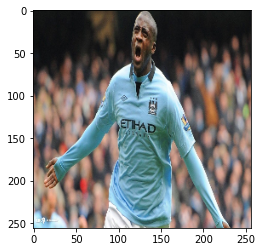

In [79]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 39ms/step


In [81]:
yhat

array([[6.353388e-07]], dtype=float32)

In [82]:
if yhat > 0.5: 
    print(f'Predicted team is Man Utd')
else:
    print(f'Predicted team is Man City')

Predicted team is Man City
